# Philly Crime
## This script analyzes Philly Crime data from Open Data Philly
![Downtown_St_Louis.jpg](http://photos.visitphilly.com/philadelphia-skyline-background-image2-1800vp.jpg)
## @author: peterdannemann

# Table of Contents
1. [Preliminary Data Set Up](#preliminary_data_setup)
    1. [Categorize The Data](#categorize_our_data)
    2. [Aggregate The Data](#aggregate_our_data)
2. [Preliminary Analysis](#preliminary_analysis)
3. [Geospatial Analysis](#geospatial_analysis)

In [2]:
# Import the packages used in this script.
import IPython
from IPython.display import HTML, display, Image

import pandas as pd # dataframe
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import datetime
import seaborn as sns # fancy plots

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<a id='preliminary_data_setup'></a>
## Preliminary Data Set Up

In [4]:
pd.options.display.max_columns = 999
os.chdir('/Users/pbd28/OneDrive/Programming/Python/PhillyCrime')

df = pd.read_csv('incidents_part1_part2.csv', delimiter=',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310150 entries, 0 to 2310149
Data columns (total 17 columns):
the_geom                object
the_geom_webmercator    object
objectid                int64
dc_dist                 int64
psa                     object
dispatch_date_time      object
dispatch_date           object
dispatch_time           object
hour_                   int64
dc_key                  int64
location_block          object
ucr_general             float64
text_general_code       object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtypes: float64(5), int64(4), object(8)
memory usage: 299.6+ MB


In [6]:
# Let's chuck the useless columns to save memory
columns = ['the_geom', 'the_geom_webmercator', 'psa', 'dc_key', 
           'ucr_general', 'dispatch_date', 'dispatch_time']
df.drop(columns, inplace=True, axis=1)

In [7]:
# Change data types for times to allow for time analysis.
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])
df['Month'] = df['dispatch_date_time'].dt.month
df['Year'] = df['dispatch_date_time'].dt.year

Let's start with a list of our unique types of crimes.

In [8]:
crime_types = list(df['text_general_code'].unique())

print('Types of Crimes:')
for i in range(len(crime_types)):
    print(crime_types[i])

Types of Crimes:
Vandalism/Criminal Mischief
Robbery Firearm
Thefts
Other Assaults
Theft from Vehicle
Aggravated Assault No Firearm
Vagrancy/Loitering
Burglary Non-Residential
Forgery and Counterfeiting
Disorderly Conduct
Burglary Residential
Fraud
All Other Offenses
Aggravated Assault Firearm
Robbery No Firearm
Narcotic / Drug Law Violations
Arson
Other Sex Offenses (Not Commercialized)
Rape
Liquor Law Violations
Weapon Violations
Public Drunkenness
Embezzlement
Prostitution and Commercialized Vice
Receiving Stolen Property
Offenses Against Family and Children
Gambling Violations
DRIVING UNDER THE INFLUENCE
Recovered Stolen Motor Vehicle
Motor Vehicle Theft
Homicide - Criminal
Homicide - Criminal 
Homicide - Justifiable 
Homicide - Gross Negligence
nan


In [9]:
print('Number of Types of Crimes: ' + str(i))

Number of Types of Crimes: 34


<a id='categorize_our_data'></a>
## Categorize the Data

A lot of these types of crimes are pretty similar, let's group the similar ones together.
Our categories for crime types will be: Violent_Crime, Theft, and Other.

In [10]:
crimes_dict = {
              'Vandalism/Criminal Mischief': 'Theft',
              'Robbery Firearm': 'Theft',
              'Thefts': 'Theft',
              'Other Assaults': 'Violent_Crime',
              'Theft from Vehicle': 'Theft',
              'Fraud': 'Theft',
              'Aggravated Assault No Firearm': 'Violent_Crime',
              'Burglary Non-Residential': 'Theft',
              'Forgery and Counterfeiting': 'Theft',
              'Disorderly Conduct': 'Other',
              'Burglary Residential': 'Theft',
              'All Other Offenses': 'Other',
              'Aggravated Assault Firearm': 'Violent_Crime',
              'Robbery No Firearm': 'Theft',
              'Narcotic / Drug Law Violations': 'Other',
              'Vagrancy/Loitering': 'Other',
              'Other Sex Offenses (Not Commercialized)': 'Other',
              'Arson': 'Other',
              'Rape': 'Other',
              'Recovered Stolen Motor Vehicle':'Theft',
              'Liquor Law Violations': 'Other',
              'Weapon Violations': 'Violent_Crime',
              'Public Drunkenness': 'Other',
              'Embezzlement': 'Other',
              'Prostitution and Commercialized Vice': 'Other',
              'Receiving Stolen Property': 'Other',
              'Offenses Against Family and Children': 'Other',
              'Gambling Violations': 'Other',
              'DRIVING UNDER THE INFLUENCE': 'Other',
              'Motor Vehicle Theft': 'Theft',
              'Homicide - Criminal': 'Violent_Crime',
              'Homicide - Criminal': 'Violent_Crime',
              'Homicide - Justifiable': 'Violent_Crime', 
              'Homicide - Gross Negligence': 'Violent_Crime'
              }
df['Crime_Category'] = df['text_general_code'].map(crimes_dict)

In [11]:
# create a value column with a 1 for easy counting when aggregating
df['Value'] = 1

crime_category_count = df.groupby(['Crime_Category'])['Value'].sum()
display(crime_category_count)

Crime_Category
Other             761705
Theft            1136173
Violent_Crime     410337
Name: Value, dtype: int64

<a id='aggregate_our_dataa'></a>
## Aggregate the Data

Group by crime code, police district, year, month and time to see trends across these parameters.

In [12]:
crime_count = df.groupby(['text_general_code'])['Value'].sum()
crime_count = crime_count.sort_values(ascending=False).reset_index()

district_count = df.groupby(['dc_dist'])['Value'].sum().reset_index()
district_count = district_count.sort_values(by='Value', ascending=False).reset_index()

year_count = df.groupby(['Year'])['Value'].sum().reset_index()

month_count = df.groupby(['Month'])['Value'].sum().reset_index()

time_count = df.groupby(['hour_'])['Value'].sum().reset_index()

<a id='preliminary_analysis'></a>
## Preliminary Analysis

### Crime by Type of Crime 

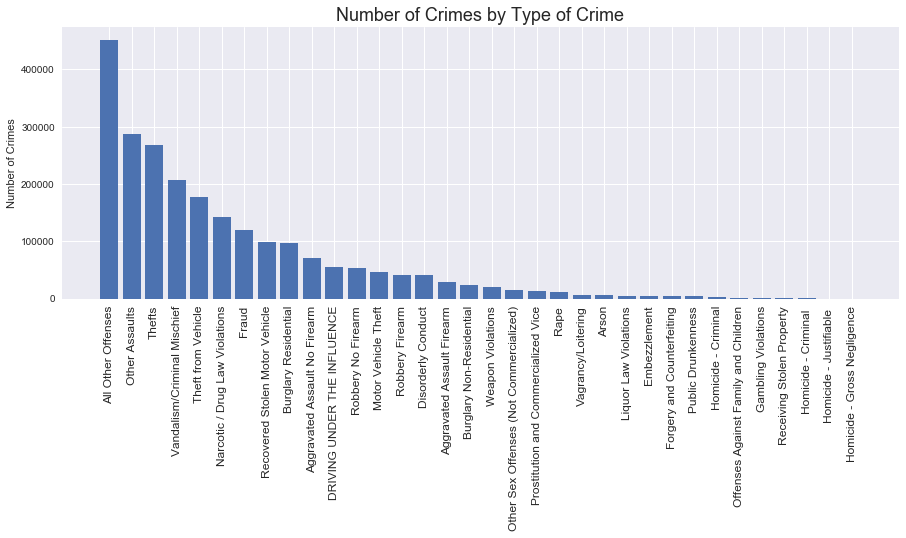

In [13]:
fig1, ax1 = plt.subplots(figsize=(15,5))
x1 = range(len(crime_count['Value']))
x1_tick_labels = crime_count['text_general_code']
y1 = crime_count['Value']
ax1.bar(x1, y1)
ax1.set_xticks(x1)
ax1.set_xticklabels(x1_tick_labels, rotation='vertical', fontsize=12)
ax1.set_title('Number of Crimes by Type of Crime', fontsize = 18)
ax1.set_ylabel('Number of Crimes')

### Crime by Police District

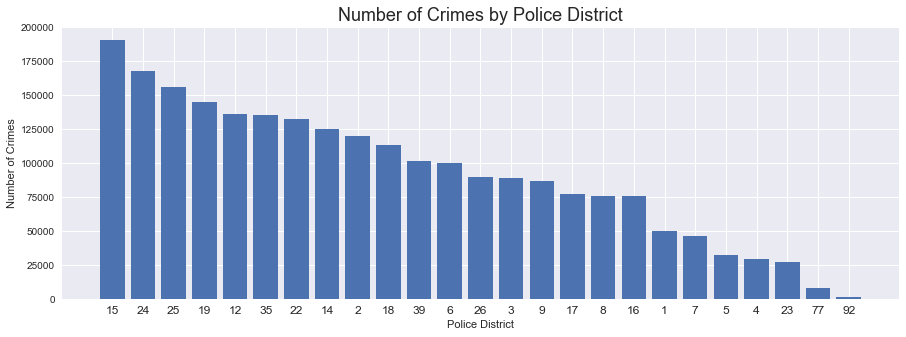

In [14]:
fig2, ax2 = plt.subplots(figsize=(15,5))
x2 = range(len(district_count['Value']))
x2_tick_labels = district_count['dc_dist']
y2 = district_count['Value']
ax2.bar(x2, y2)
ax2.set_xticks(x2)
ax2.set_xticklabels(x2_tick_labels, fontsize=12)
ax2.set_title('Number of Crimes by Police District', fontsize=18)
ax2.set_xlabel('Police District')
ax2.set_ylabel('Number of Crimes')

### Crime by Year

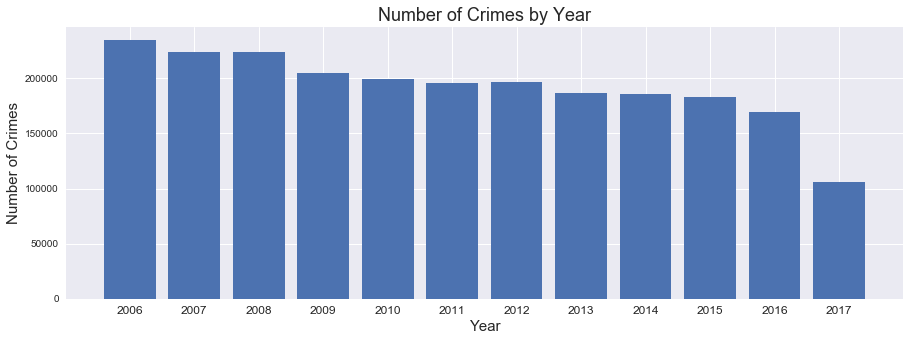

In [15]:
fig3, ax3 = plt.subplots(figsize=(15,5))
x3 = range(len(year_count['Year']))
x3_tick_labels = year_count['Year']
y3 = year_count['Value']
ax3.bar(x3, y3)
ax3.set_xticks(x3)
ax3.set_xticklabels(x3_tick_labels, fontsize=12)
ax3.set_title('Number of Crimes by Year', fontsize=18)
ax3.set_xlabel('Year',fontsize=15)
ax3.set_ylabel('Number of Crimes',fontsize=15)
fig3.savefig('CrimesByYear')

### Crime by Month

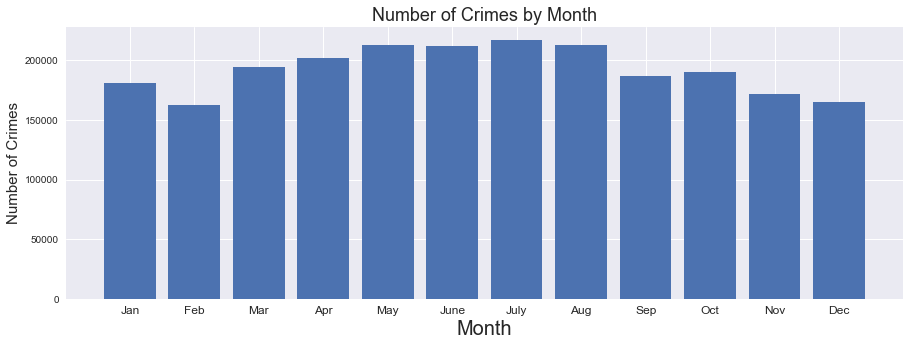

In [16]:
fig4, ax4 = plt.subplots(figsize=(15,5))
x4 = range(len(month_count['Month']))
x4_tick_labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
y4 = month_count['Value']
ax4.bar(x4, y4)
ax4.set_xticks(x4)
ax4.set_xticklabels(x4_tick_labels, fontsize=12)
ax4.set_title('Number of Crimes by Month', fontsize=18)
ax4.set_xlabel('Month',fontsize=20)
ax4.set_ylabel('Number of Crimes',fontsize=15)
fig4.savefig('CrimesByMonth')

### Crime by Hour

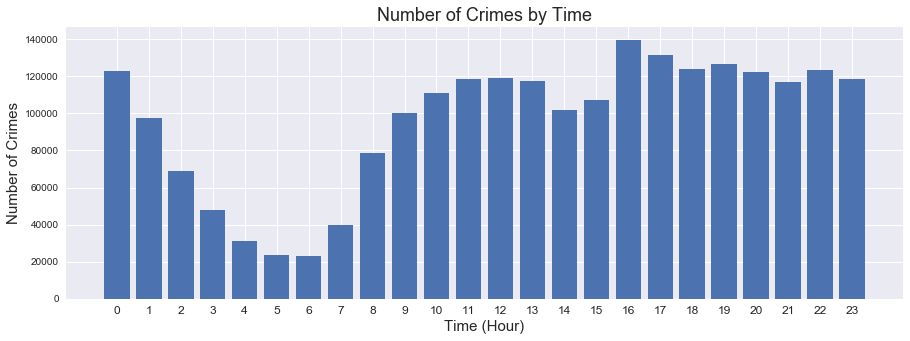

In [17]:
fig5, ax5 = plt.subplots(figsize=(15,5))
x5 = range(len(time_count['hour_']))
x5_tick_labels = time_count['hour_']
y5 = time_count['Value']
ax5.bar(x5, y5)
ax5.set_xticks(x5)
ax5.set_xticklabels(x5_tick_labels, fontsize=12)
ax5.set_title('Number of Crimes by Time', fontsize=18)
ax5.set_xlabel('Time (Hour)', fontsize=15)
ax5.set_ylabel('Number of Crimes', fontsize=15)
fig5.savefig('CrimesByHour')